In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [8]:
pd.set_option('display.max_columns',100)

In [9]:
data_frame=pd.read_csv('baseball_data.csv')

In [10]:
data_frame.head()

,bip_id,game_date,home_team,away_team,batter_team,batter_name,pitcher_name,batter_id,pitcher_id,is_batter_lefty,is_pitcher_lefty,bb_type,bearing,pitch_name,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
0,20,2020-08-10,COL,ARI,COL,"story, trevor","ray, robbie",596115,592662,0,1,line_drive,left,Changeup,7,1,1,0,1,-0.65,2.09,89.5,105.4,28.0,1
1,22,2020-07-30,ARI,LAD,LAD,"seager, corey","ray, robbie",608369,592662,1,1,line_drive,right,Slider,0,2,0,1,1,-0.26,3.01,84.8,104.9,NaN,1
2,26,2020-07-30,ARI,LAD,LAD,"pollock, aj","ray, robbie",572041,592662,0,1,fly_ball,left,4-Seam Fastball,0,1,2,1,1,-0.42,2.98,92.1,101.7,38.0,1
3,42,2020-08-05,ARI,HOU,HOU,"springer, george","ray, robbie",543807,592662,0,1,line_drive,left,4-Seam Fastball,0,5,0,3,1,-0.40,2.76,94.0,104.5,24.0,1
4,48,2020-08-05,ARI,HOU,HOU,"tucker, kyle","ray, robbie",663656,592662,1,1,line_drive,center,4-Seam Fastball,0,2,0,1,1,-0.04,2.16,93.8,105.4,27.0,1


In [11]:
#Understanding the problem domain
#Predicting whether the hit can be a home run or not based on the different parameters
#It is a classification problem

In [12]:
#Data collection 
#It is downloaded from kaggle

## Exploratory data analysis

Tasks to be done...
- checking the distributions
- checking the null values and its impact
- checking the relation between the categorical features and output feature
- checking the statistics

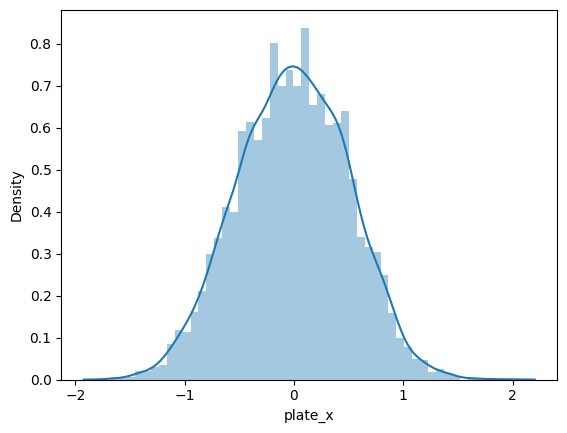

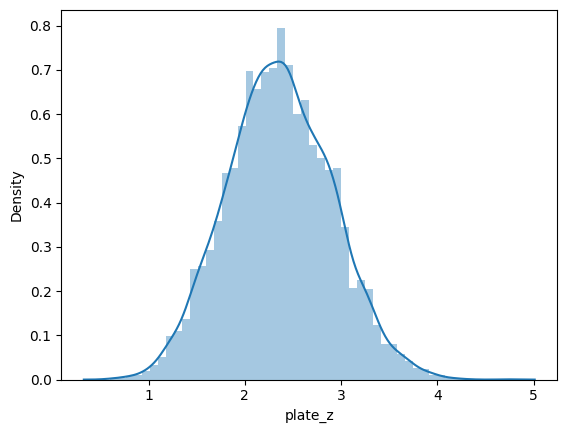

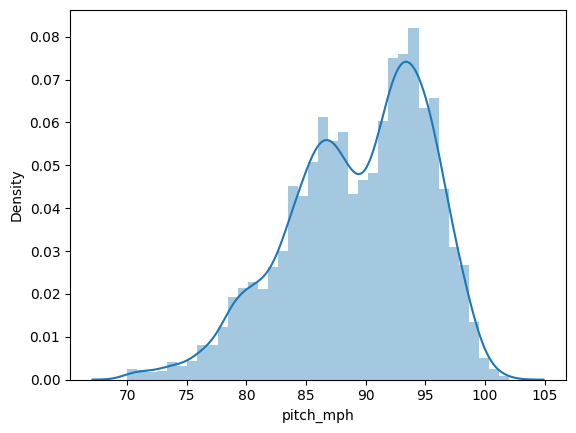

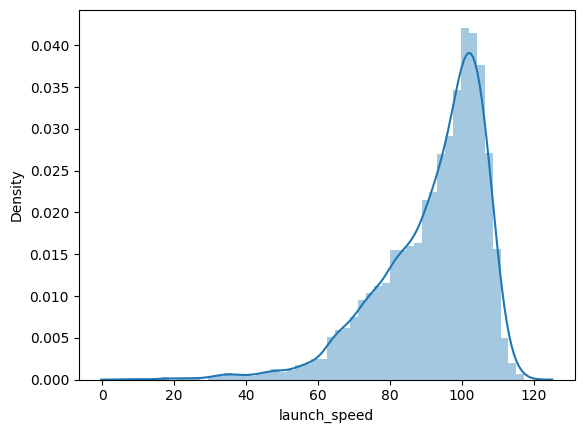

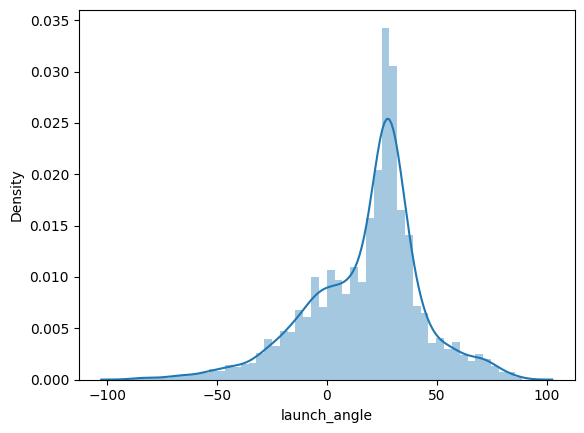

In [13]:
for col in data_frame.select_dtypes(['float']):
    sns.distplot(data_frame[col])
    plt.show()

### There is skewness for pitch_mph, launch_speed features

For pitch_mph


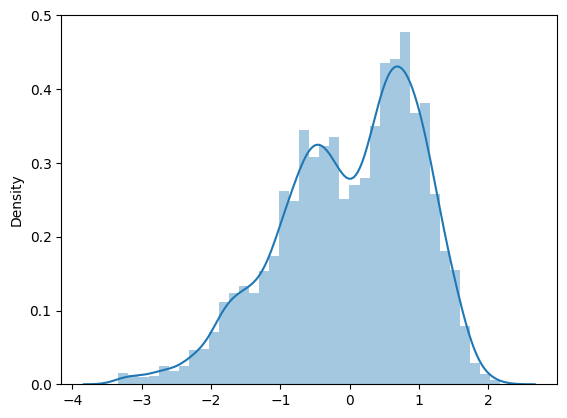

In [14]:
#let us try transforming the values and check it again
print('For pitch_mph')
sns.distplot(StandardScaler().fit_transform(data_frame[['pitch_mph']]));
plt.show()

For launch_speed


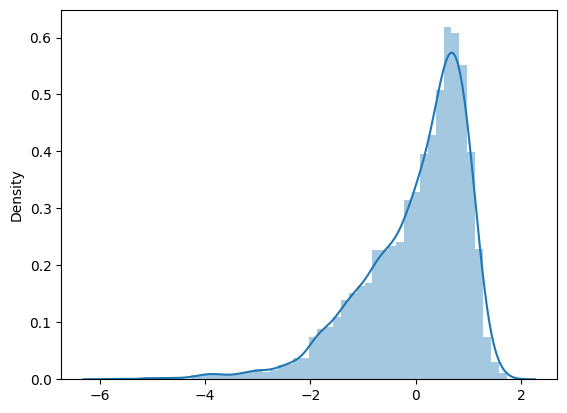

In [15]:
print('For launch_speed')
sns.distplot(StandardScaler().fit_transform(data_frame[['launch_speed']]));
plt.show()

There is no change in the distribution, even after transforming the values

In [16]:
def null_count_gen(data_frame):
    null_count_values=data_frame.isnull().sum().values
    null_count_index = data_frame.isnull().sum().index
    null_count_data = pd.DataFrame({'Column':null_count_index,'Percentage':list(null_count_values/len(data_frame))})
    null_count_data = null_count_data[null_count_data['Percentage']>0].sort_values('Percentage',ascending=False)
    return null_count_data
null_count_data = null_count_gen(data_frame)
null_count_data

,Column,Percentage
22,launch_speed,0.265391
23,launch_angle,0.262098


### Findings
- There are 25 percent of null values in launch_speed and launch_ange columns
- And very less number of null values in bb_type column

In [17]:
data_frame[null_count_data['Column'].values].head()

,launch_speed,launch_angle
0,105.4,28.0
1,104.9,NaN
2,101.7,38.0
3,104.5,24.0
4,105.4,27.0


<Axes: ylabel='launch_speed'>

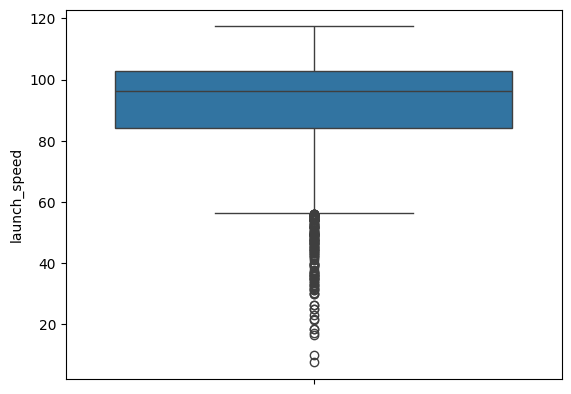

In [18]:
sns.boxplot(data_frame['launch_speed'])

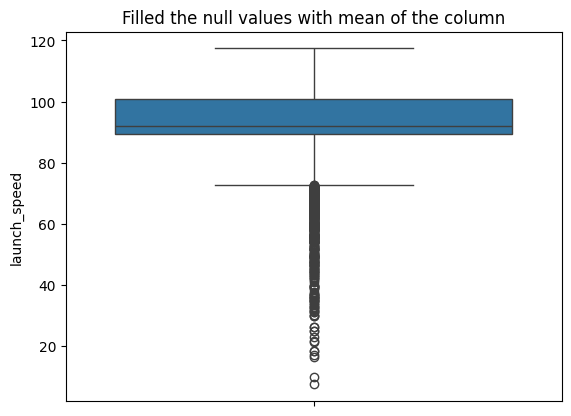

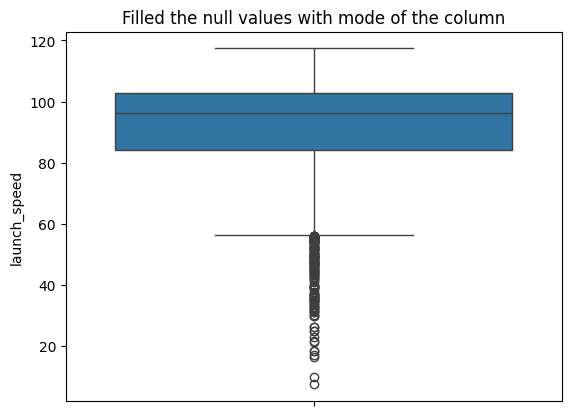

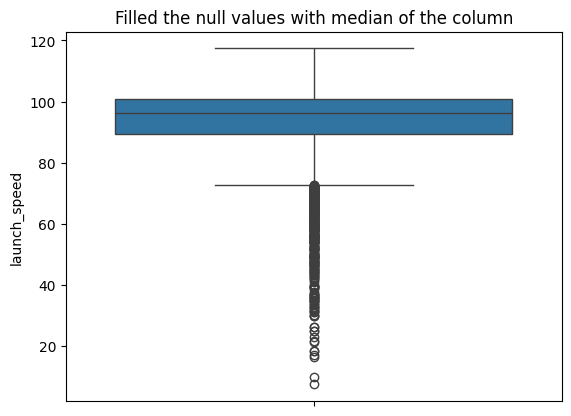

In [19]:
plt.title('Filled the null values with mean of the column')
sns.boxplot(data_frame['launch_speed'].fillna(data_frame['launch_speed'].mean()))
plt.show()
plt.title('Filled the null values with mode of the column')
sns.boxplot(data_frame['launch_speed'].fillna(data_frame['launch_speed'].mode()))
plt.show()
plt.title('Filled the null values with median of the column')
sns.boxplot(data_frame['launch_speed'].fillna(data_frame['launch_speed'].median()))
plt.show()

### When the values are filled with mode imputation there are no addition of outlier values according to the boxplot

In [20]:
data_frame['launch_speed'].mode()[0]

103.3

In [21]:
#imputing the values for launch_speed
data_frame['launch_speed']=data_frame['launch_speed'].fillna(data_frame['launch_speed'].mode()[0],axis=0)

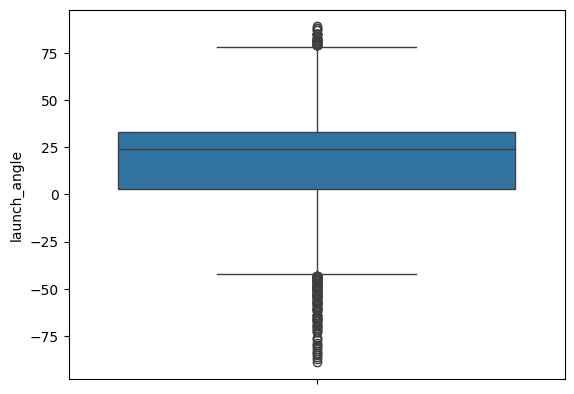

In [22]:
#Checking for launch_angle
sns.boxplot(data_frame['launch_angle']);

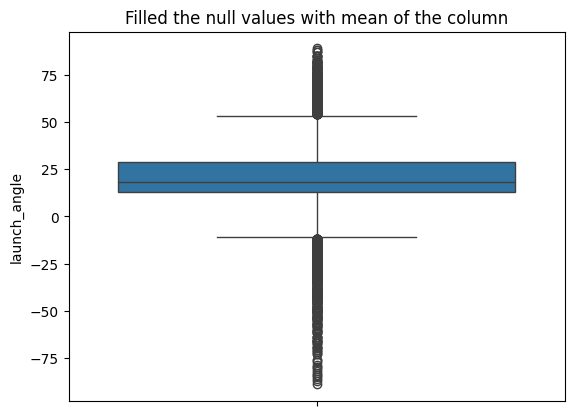

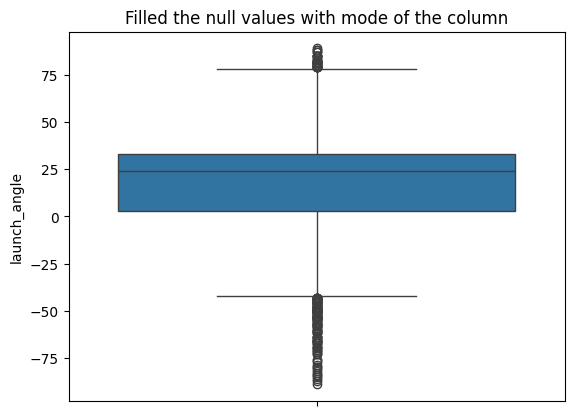

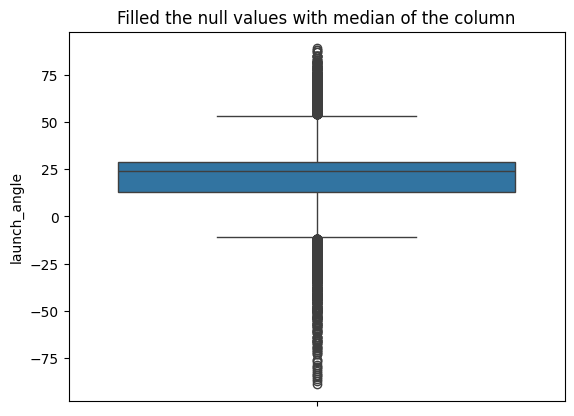

In [23]:
plt.title('Filled the null values with mean of the column')
sns.boxplot(data_frame['launch_angle'].fillna(data_frame['launch_angle'].mean()))
plt.show()
plt.title('Filled the null values with mode of the column')
sns.boxplot(data_frame['launch_angle'].fillna(data_frame['launch_angle'].mode()))
plt.show()
plt.title('Filled the null values with median of the column')
sns.boxplot(data_frame['launch_angle'].fillna(data_frame['launch_angle'].median()))
plt.show()

### Same for launch_angle, we need to fill the null values using the mode value of the launch_angle column. 
### So, there no more outliers added to the column

### Outlier detection 

In [24]:
#Checking the outliers in the numerical features
num_data = data_frame.select_dtypes(include=['int','float'])
num_data.head()

,bip_id,batter_id,pitcher_id,is_batter_lefty,is_pitcher_lefty,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
0,20,596115,592662,0,1,7,1,1,0,1,-0.65,2.09,89.5,105.4,28.0,1
1,22,608369,592662,1,1,0,2,0,1,1,-0.26,3.01,84.8,104.9,NaN,1
2,26,572041,592662,0,1,0,1,2,1,1,-0.42,2.98,92.1,101.7,38.0,1
3,42,543807,592662,0,1,0,5,0,3,1,-0.40,2.76,94.0,104.5,24.0,1
4,48,663656,592662,1,1,0,2,0,1,1,-0.04,2.16,93.8,105.4,27.0,1


### We are going to check the outliers only for the continous features

In [25]:
for col in num_data.columns:
    #getting the length of distinct values
    length = len(data_frame[col].value_counts())
    print(f'{col}: {length}')

bip_id: 7894
batter_id: 482
pitcher_id: 601
is_batter_lefty: 2
is_pitcher_lefty: 2
park: 30
inning: 13
outs_when_up: 3
balls: 4
strikes: 3
plate_x: 299
plate_z: 321
pitch_mph: 307
launch_speed: 684
launch_angle: 172
is_home_run: 2


### We are going to consider the continous features such as plate_x, plate_z, pitch_mph, launch_speed, launch_angle for checking the outliers

In [26]:
num_cols_to_consider =['plate_x', 'plate_z', 'pitch_mph', 'launch_speed', 'launch_angle']

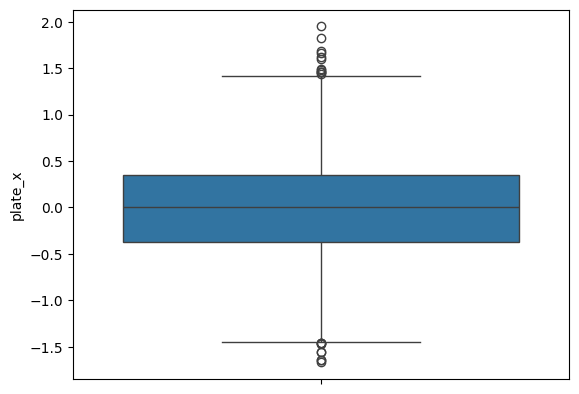

In [27]:
sns.boxplot(data_frame[num_cols_to_consider[0]]);

<Axes: ylabel='plate_x'>

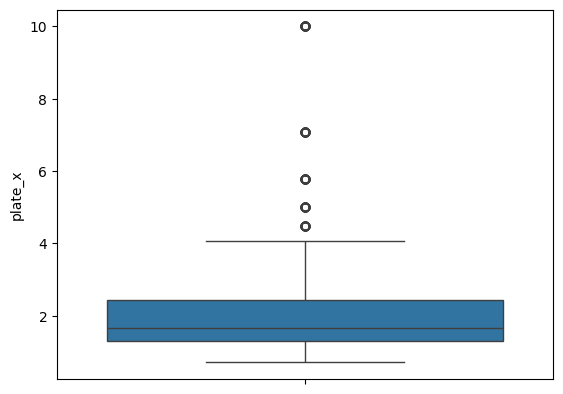

In [28]:
sns.boxplot(1/(data_frame[num_cols_to_consider[0]]**0.5))

<Axes: ylabel='plate_z'>

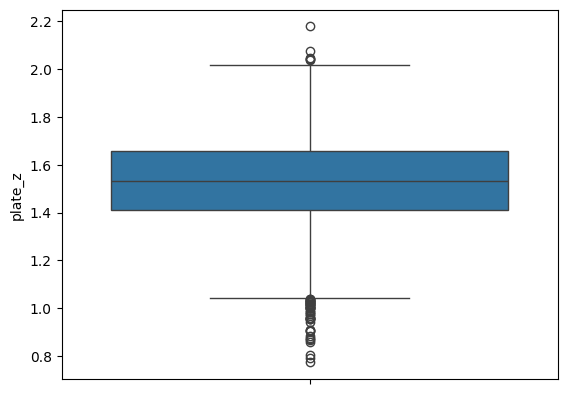

In [29]:
sns.boxplot(data_frame[num_cols_to_consider[1]]**0.5)

### We are not supposed to change the outlier values since the values are standard and they are defined to be those values.
### For this issue, we can use scaling techniques to transform the data which will be used to train the model with these values.

In [30]:
data_frame[num_data.columns].corr()

,bip_id,batter_id,pitcher_id,is_batter_lefty,is_pitcher_lefty,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
bip_id,1.000000,0.030435,-0.035209,-0.015899,-0.068886,-0.063780,0.011599,-0.018324,0.027162,-0.062948,0.000473,0.111498,-0.059912,0.331772,0.214292,0.787978
batter_id,0.030435,1.000000,-0.035904,0.004229,-0.003855,0.023586,0.005419,-0.025126,0.000380,0.003172,-0.009326,0.004716,-0.014322,-0.005301,-0.040978,0.026647
pitcher_id,-0.035209,-0.035904,1.000000,0.000827,0.041175,-0.065030,0.001432,0.006836,-0.002277,-0.013733,0.023751,0.002657,0.134388,0.006220,-0.023914,-0.043507
is_batter_lefty,-0.015899,0.004229,0.000827,1.000000,-0.172016,-0.026580,-0.008480,-0.000747,0.019532,-0.001606,-0.081098,-0.009831,0.026627,-0.017855,0.008904,-0.001755
is_pitcher_lefty,-0.068886,-0.003855,0.041175,-0.172016,1.000000,0.056171,-0.137357,-0.024625,0.009804,0.036488,0.002959,0.006845,-0.115034,-0.037210,-0.064114,-0.090708
park,-0.063780,0.023586,-0.065030,-0.026580,0.056171,1.000000,-0.023595,-0.000245,0.007624,0.011941,0.001644,0.016561,-0.006853,-0.010749,-0.004608,-0.053617
inning,0.011599,0.005419,0.001432,-0.008480,-0.137357,-0.023595,1.000000,-0.004142,-0.004468,-0.011095,-0.015968,0.024671,0.083199,-0.008511,0.005929,-0.003417
outs_when_up,-0.018324,-0.025126,0.006836,-0.000747,-0.024625,-0.000245,-0.004142,1.000000,0.028591,-0.007615,0.004500,-0.021907,0.023603,0.001911,0.023116,-0.022861
balls,0.027162,0.000380,-0.002277,0.019532,0.009804,0.007624,-0.004468,0.028591,1.000000,0.391791,0.007500,-0.003158,0.082901,0.063714,0.044191,0.042686
strikes,-0.062948,0.003172,-0.013733,-0.001606,0.036488,0.011941,-0.011095,-0.007615,0.391791,1.000000,0.027822,-0.033025,-0.073152,-0.045284,-0.037890,-0.073501


<Axes: >

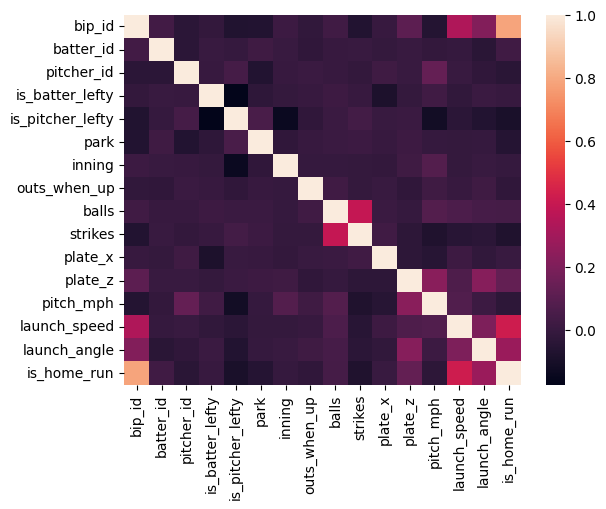

In [31]:
sns.heatmap(data_frame[num_data.columns].corr())

### There is not much correlation between the features. Couldn't find the positive nor the negative correlation 

In [32]:
data_frame.head()

,bip_id,game_date,home_team,away_team,batter_team,batter_name,pitcher_name,batter_id,pitcher_id,is_batter_lefty,is_pitcher_lefty,bb_type,bearing,pitch_name,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
0,20,2020-08-10,COL,ARI,COL,"story, trevor","ray, robbie",596115,592662,0,1,line_drive,left,Changeup,7,1,1,0,1,-0.65,2.09,89.5,105.4,28.0,1
1,22,2020-07-30,ARI,LAD,LAD,"seager, corey","ray, robbie",608369,592662,1,1,line_drive,right,Slider,0,2,0,1,1,-0.26,3.01,84.8,104.9,NaN,1
2,26,2020-07-30,ARI,LAD,LAD,"pollock, aj","ray, robbie",572041,592662,0,1,fly_ball,left,4-Seam Fastball,0,1,2,1,1,-0.42,2.98,92.1,101.7,38.0,1
3,42,2020-08-05,ARI,HOU,HOU,"springer, george","ray, robbie",543807,592662,0,1,line_drive,left,4-Seam Fastball,0,5,0,3,1,-0.40,2.76,94.0,104.5,24.0,1
4,48,2020-08-05,ARI,HOU,HOU,"tucker, kyle","ray, robbie",663656,592662,1,1,line_drive,center,4-Seam Fastball,0,2,0,1,1,-0.04,2.16,93.8,105.4,27.0,1


### Checking the relationship between the input features and the output feature

In [33]:
#getting the object features
object_cols = data_frame.select_dtypes('O').columns

In [34]:
object_cols

Index(['game_date', 'home_team', 'away_team', 'batter_team', 'batter_name',
       'pitcher_name', 'bb_type', 'bearing', 'pitch_name'],
      dtype='object')

2020-08-30 has highest count in homeruns i.e 52; 2020-09-17 has less homeruns i.e 36


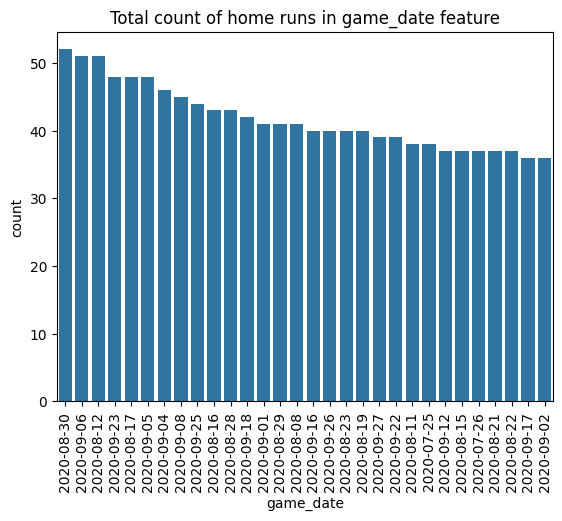

LAD has highest count in homeruns i.e 126; MIA has less homeruns i.e 61


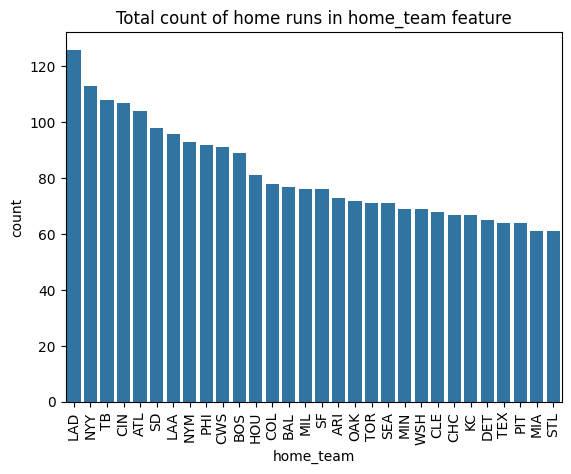

TB has highest count in homeruns i.e 107; CIN has less homeruns i.e 52


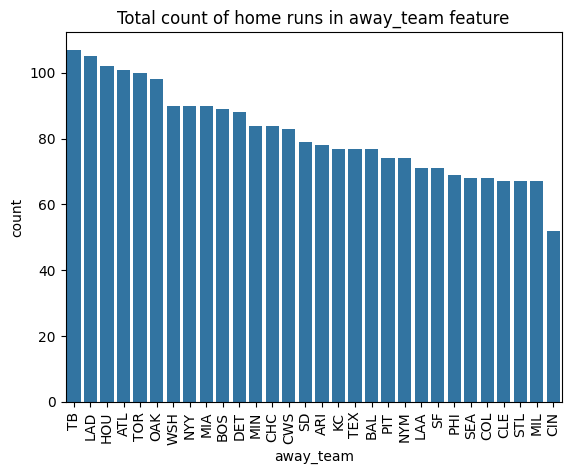

LAD has highest count in homeruns i.e 145; STL has less homeruns i.e 54


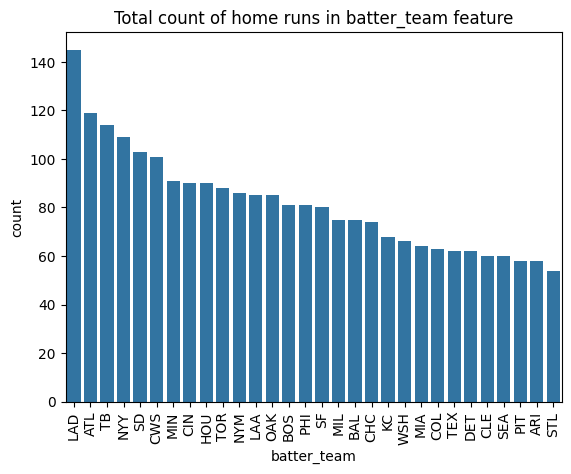

seager, corey has highest count in homeruns i.e 23; harper, bryce has less homeruns i.e 13


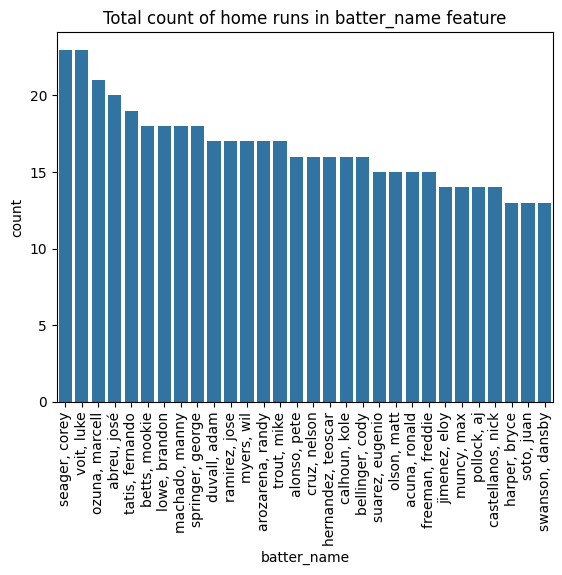

glasnow, tyler has highest count in homeruns i.e 19; civale, aaron has less homeruns i.e 11


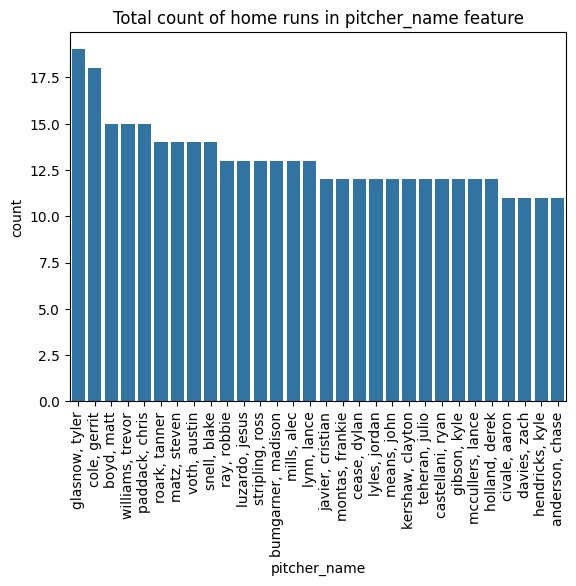

fly_ball has highest count in homeruns i.e 1345; line_drive has less homeruns i.e 1102


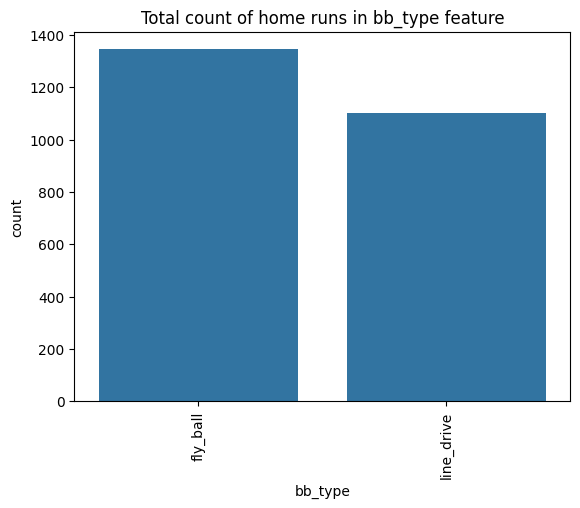

center has highest count in homeruns i.e 1520; right has less homeruns i.e 440


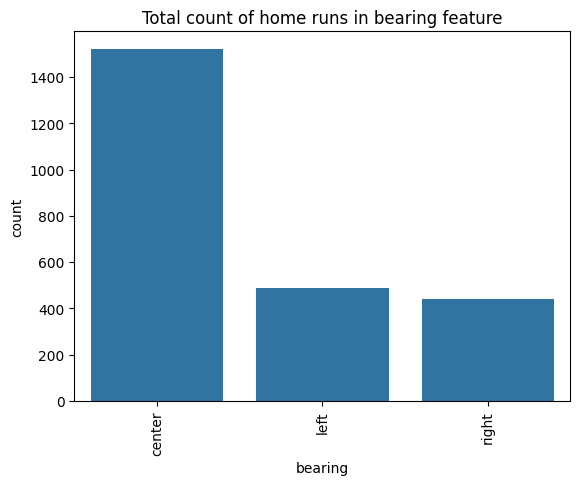

4-Seam Fastball has highest count in homeruns i.e 1014; Split-Finger has less homeruns i.e 37


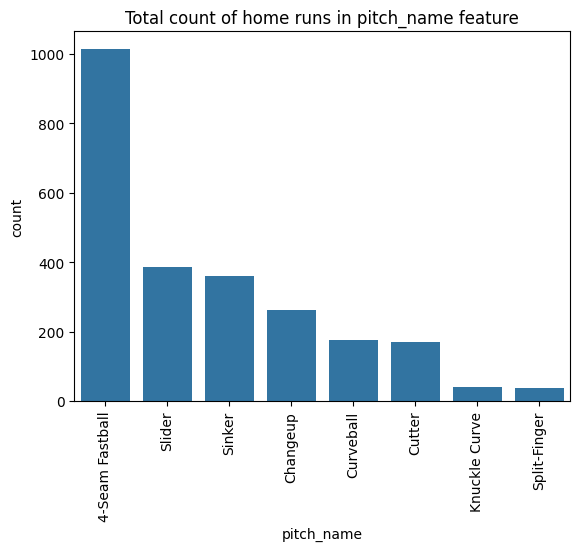

In [35]:
for col in object_cols:
    home_run_team_counts = data_frame[data_frame['is_home_run']==1][col].value_counts()[:30]
    plt.xticks(rotation=90)
    plt.title(f'Total count of home runs in {col} feature')
    sns.barplot(home_run_team_counts)
    max_value = home_run_team_counts.max()
    max_value_label = home_run_team_counts.idxmax()
    min_value = home_run_team_counts.min()
    min_value_label = home_run_team_counts.idxmin()
    print(f'{max_value_label} has highest count in homeruns i.e {max_value}; {min_value_label} has less homeruns i.e {min_value}')
    plt.show();

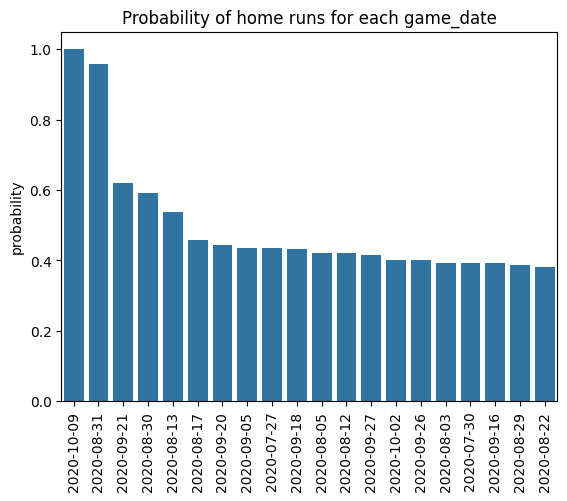

Here are top 5 probability scores
2020-10-09    1.000000
2020-08-31    0.958333
2020-09-21    0.620690
2020-08-30    0.590909
2020-08-13    0.538462
Name: probability, dtype: float64


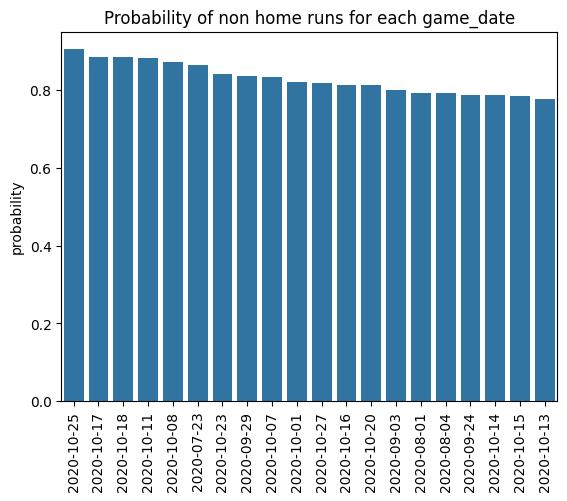

Here are top 5 probability scores
2020-10-25    0.904762
2020-10-17    0.885714
2020-10-18    0.884615
2020-10-11    0.882353
2020-10-08    0.873016
Name: probability, dtype: float64


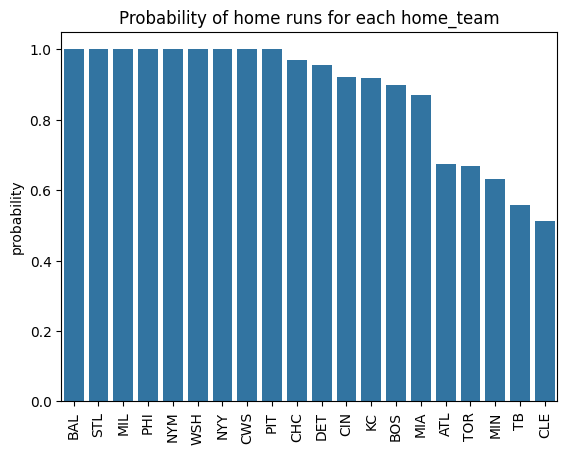

Here are top 5 probability scores
BAL    1.0
STL    1.0
MIL    1.0
PHI    1.0
NYM    1.0
Name: probability, dtype: float64


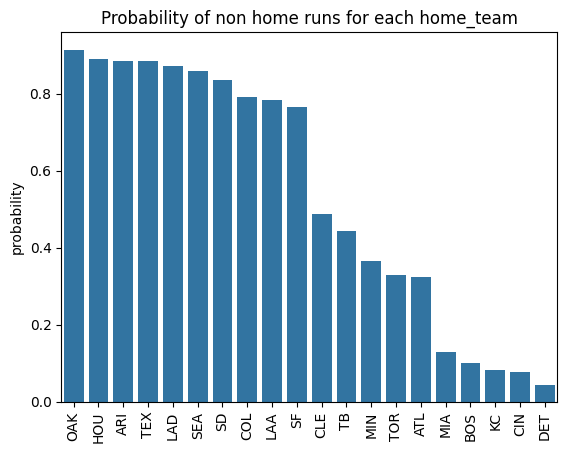

Here are top 5 probability scores
OAK    0.913565
HOU    0.889946
ARI    0.884676
TEX    0.883848
LAD    0.870902
Name: probability, dtype: float64


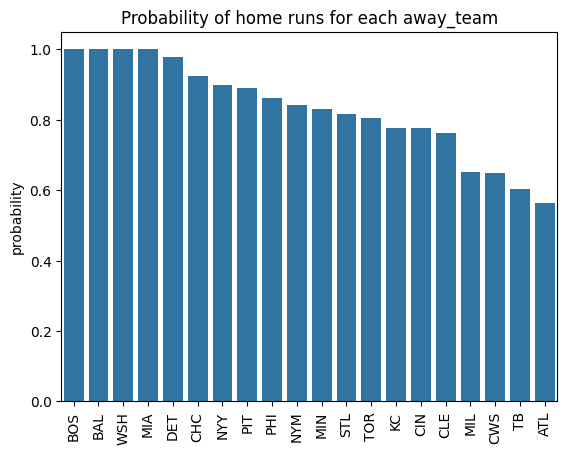

Here are top 5 probability scores
BOS    1.000000
BAL    1.000000
WSH    1.000000
MIA    1.000000
DET    0.977778
Name: probability, dtype: float64


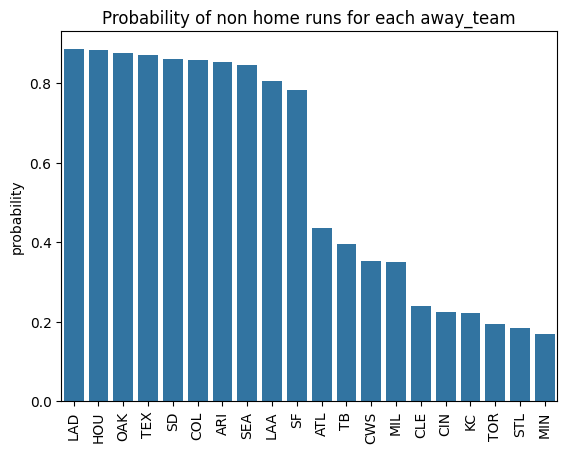

Here are top 5 probability scores
LAD    0.885621
HOU    0.882488
OAK    0.874680
TEX    0.869712
SD     0.860915
Name: probability, dtype: float64


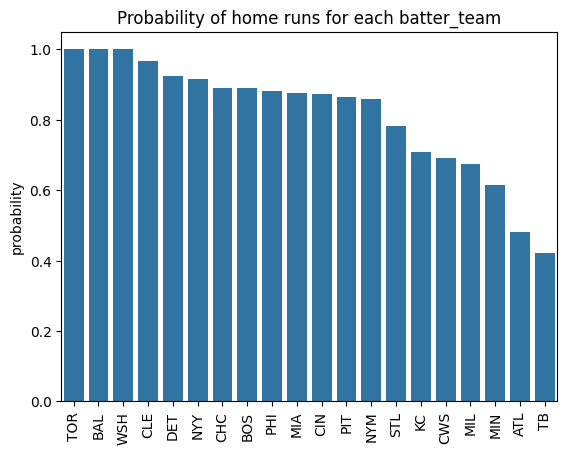

Here are top 5 probability scores
TOR    1.000000
BAL    1.000000
WSH    1.000000
CLE    0.967742
DET    0.925373
Name: probability, dtype: float64


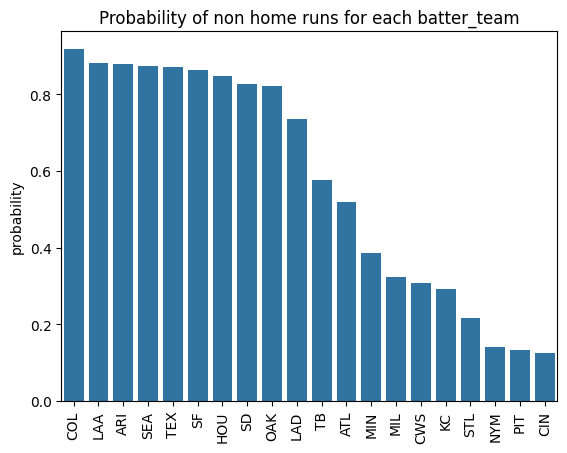

Here are top 5 probability scores
COL    0.918075
LAA    0.882920
ARI    0.879917
SEA    0.874739
TEX    0.870293
Name: probability, dtype: float64


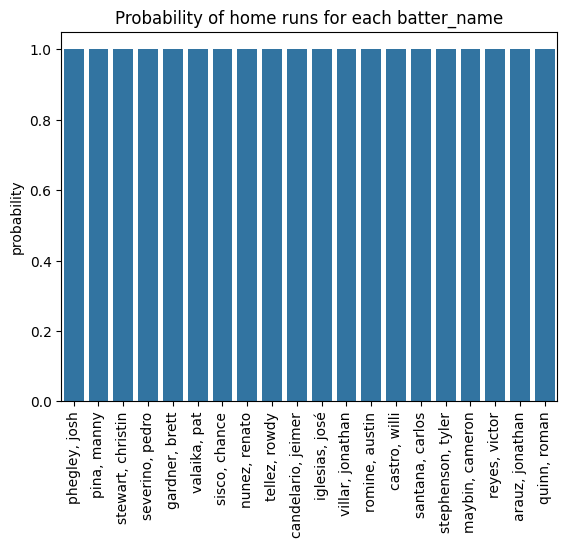

Here are top 5 probability scores
phegley, josh        1.0
pina, manny          1.0
stewart, christin    1.0
severino, pedro      1.0
gardner, brett       1.0
Name: probability, dtype: float64


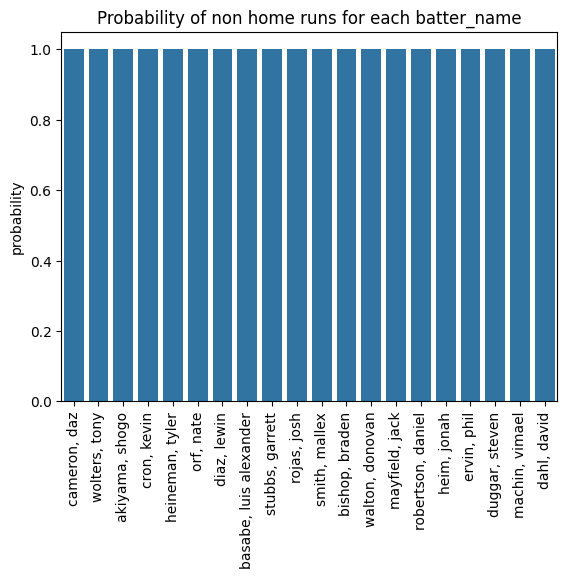

Here are top 5 probability scores
cameron, daz       1.0
wolters, tony      1.0
akiyama, shogo     1.0
cron, kevin        1.0
heineman, tyler    1.0
Name: probability, dtype: float64


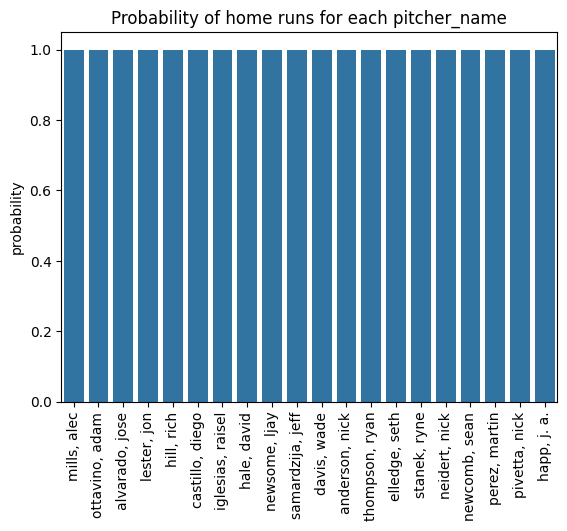

Here are top 5 probability scores
mills, alec       1.0
ottavino, adam    1.0
alvarado, jose    1.0
lester, jon       1.0
hill, rich        1.0
Name: probability, dtype: float64


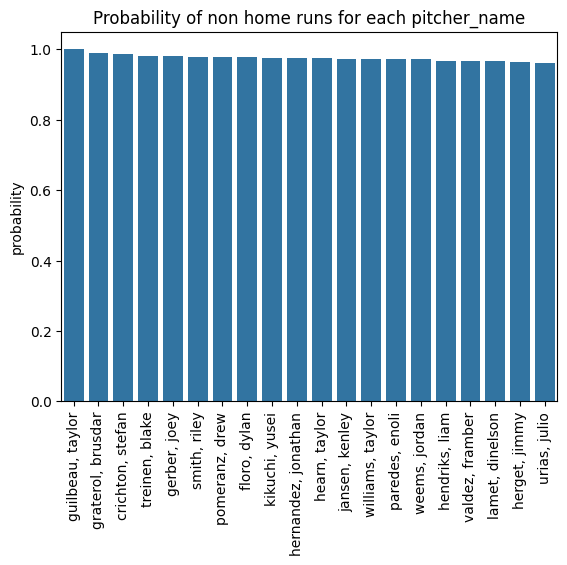

Here are top 5 probability scores
guilbeau, taylor     1.000000
graterol, brusdar    0.989362
crichton, stefan     0.986301
treinen, blake       0.981308
gerber, joey         0.980000
Name: probability, dtype: float64


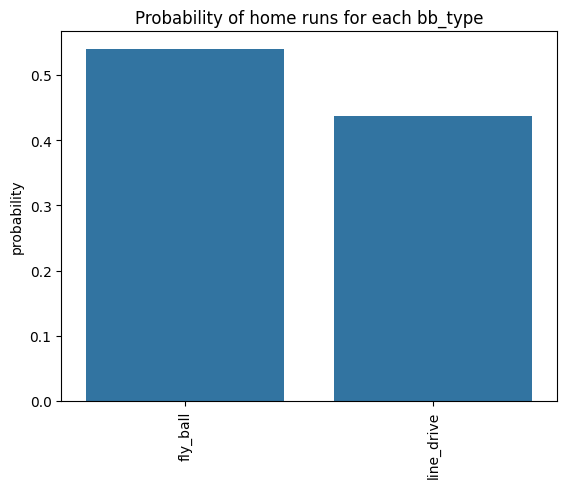

Here are top 5 probability scores
fly_ball      0.539944
line_drive    0.436782
Name: probability, dtype: float64


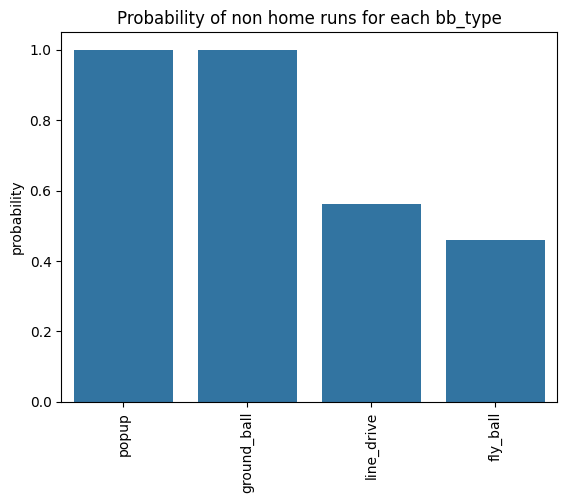

Here are top 5 probability scores
popup          1.000000
ground_ball    1.000000
line_drive     0.563218
fly_ball       0.460056
Name: probability, dtype: float64


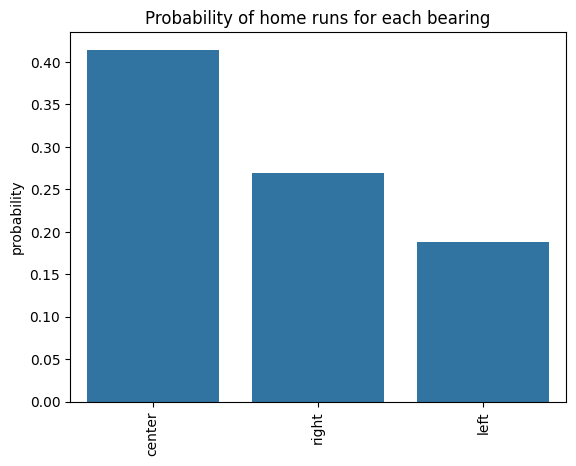

Here are top 5 probability scores
center    0.414395
right     0.268784
left      0.188104
Name: probability, dtype: float64


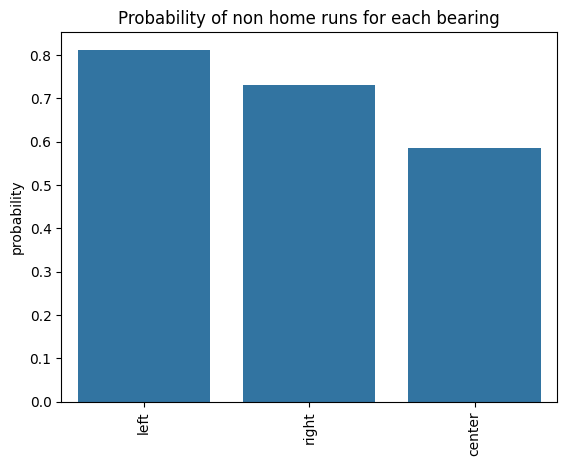

Here are top 5 probability scores
left      0.811896
right     0.731216
center    0.585605
Name: probability, dtype: float64


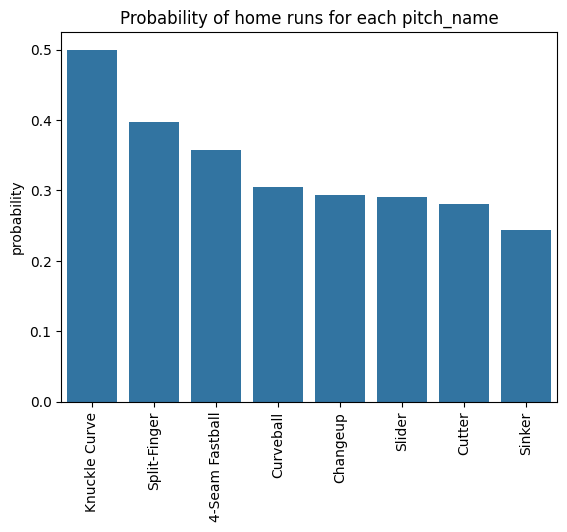

Here are top 5 probability scores
Knuckle Curve      0.500000
Split-Finger       0.397849
4-Seam Fastball    0.357042
Curveball          0.305172
Changeup           0.294183
Name: probability, dtype: float64


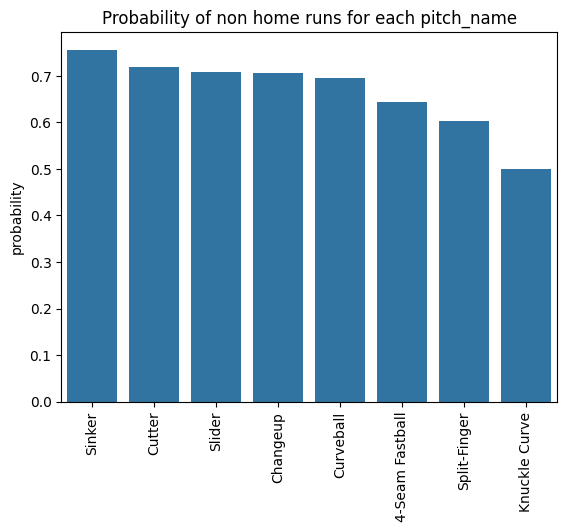

Here are top 5 probability scores
Sinker       0.756098
Cutter       0.719472
Slider       0.708995
Changeup     0.705817
Curveball    0.694828
Name: probability, dtype: float64


In [36]:
for col in object_cols:
    home_run_dict = {}
    non_home_run_dict = {}
    for label in data_frame[col].unique():    
        ind_count = data_frame.groupby(col)['is_home_run'].value_counts()[label]
        total_sum = ind_count.sum()
        if 0 in ind_count.index:
            label_0 = ind_count[0]
            non_home_run_prob = label_0/total_sum
            non_home_run_dict[label] = non_home_run_prob
        if 1 in ind_count.index:
            label_1 = ind_count[1]
            home_run_prob = label_1/total_sum
            home_run_dict[label] = home_run_prob
        
    
    homerun_df = pd.DataFrame({'probability':home_run_dict.values()},index = home_run_dict.keys())
    sorted_homerun_prob = homerun_df['probability'].sort_values(ascending=False)
    
    non_homerun_df = pd.DataFrame({'probability':non_home_run_dict.values()},index = non_home_run_dict.keys())
    sorted_non_homerun_prob = non_homerun_df['probability'].sort_values(ascending=False)
    
    plt.xticks(rotation = 90)
    plt.title(f'Probability of home runs for each {col}')
    sns.barplot(sorted_homerun_prob[:20]);
    plt.show()
    print('Here are top 5 probability scores')
    print(sorted_homerun_prob[:5])
    
    
    #sorted non homerun prob
    plt.xticks(rotation = 90)
    plt.title(f'Probability of non home runs for each {col}')
    sns.barplot(sorted_non_homerun_prob[:20]);
    plt.show()
    print('Here are top 5 probability scores')
    print(sorted_non_homerun_prob[:5])

In [37]:
#for the discrete features too
discrete_features = data_frame.select_dtypes('int').columns
discrete_features

Index(['bip_id', 'batter_id', 'pitcher_id', 'is_batter_lefty',
       'is_pitcher_lefty', 'park', 'inning', 'outs_when_up', 'balls',
       'strikes', 'is_home_run'],
      dtype='object')

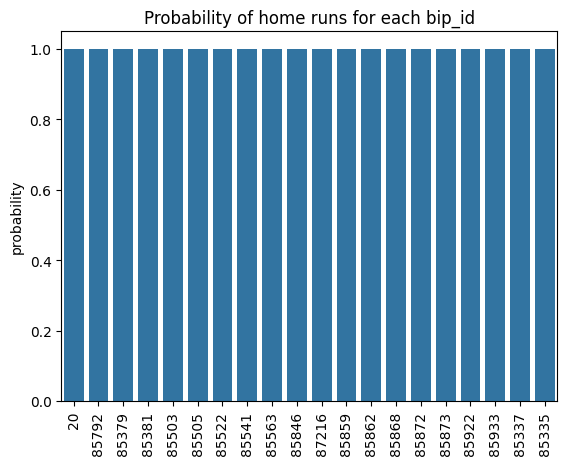

Here are top probability scores
20       1.0
85792    1.0
85379    1.0
85381    1.0
85503    1.0
Name: probability, dtype: float64


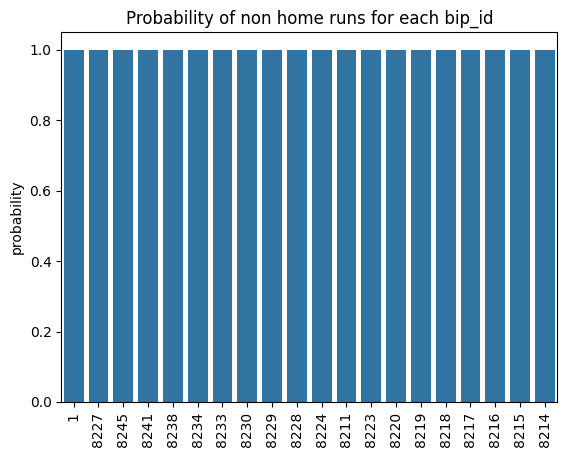

Here are top probability scores
1       1.0
8227    1.0
8245    1.0
8241    1.0
8238    1.0
Name: probability, dtype: float64


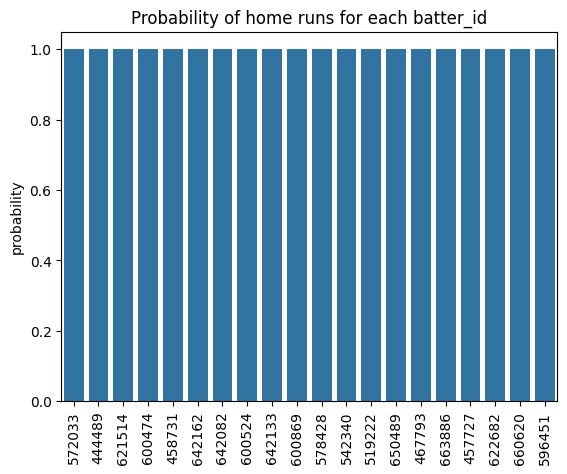

Here are top probability scores
572033    1.0
444489    1.0
621514    1.0
600474    1.0
458731    1.0
Name: probability, dtype: float64


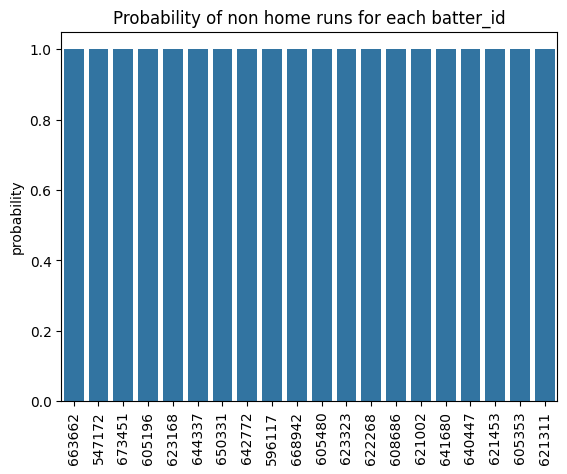

Here are top probability scores
663662    1.0
547172    1.0
673451    1.0
605196    1.0
623168    1.0
Name: probability, dtype: float64


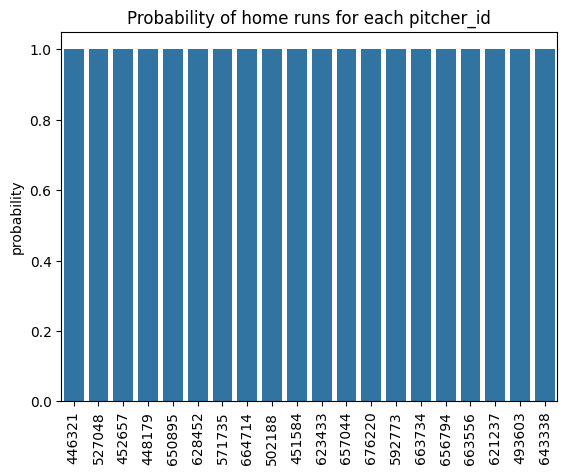

Here are top probability scores
446321    1.0
527048    1.0
452657    1.0
448179    1.0
650895    1.0
Name: probability, dtype: float64


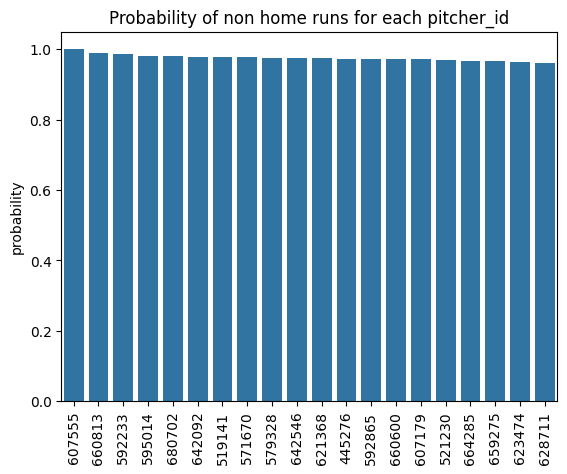

Here are top probability scores
607555    1.000000
660813    0.989362
592233    0.986301
595014    0.981308
680702    0.980000
Name: probability, dtype: float64


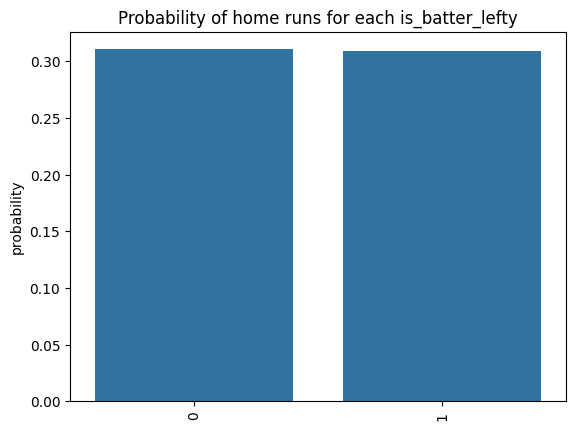

Here are top probability scores
0    0.310631
1    0.308967
Name: probability, dtype: float64


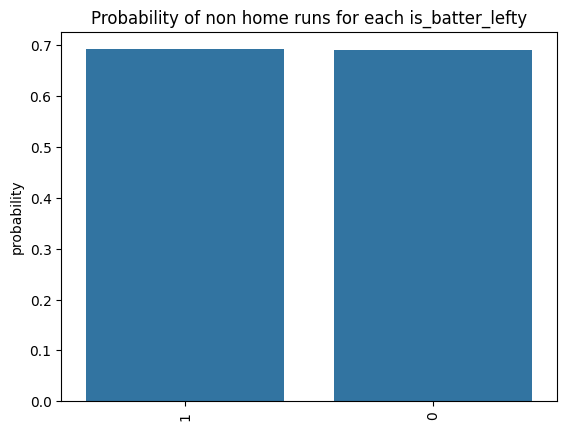

Here are top probability scores
1    0.691033
0    0.689369
Name: probability, dtype: float64


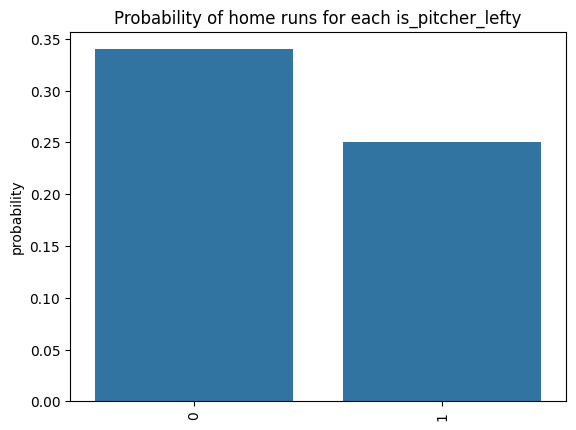

Here are top probability scores
0    0.339745
1    0.250851
Name: probability, dtype: float64


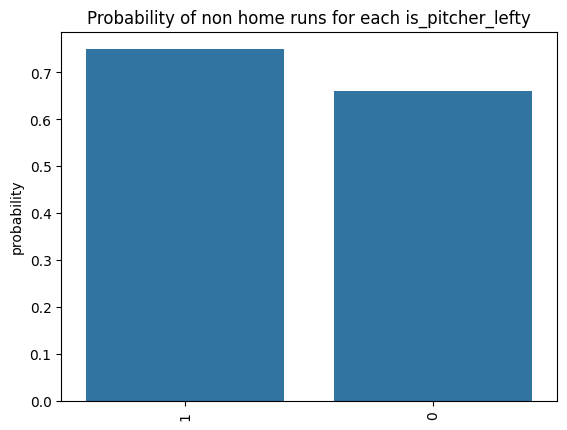

Here are top probability scores
1    0.749149
0    0.660255
Name: probability, dtype: float64


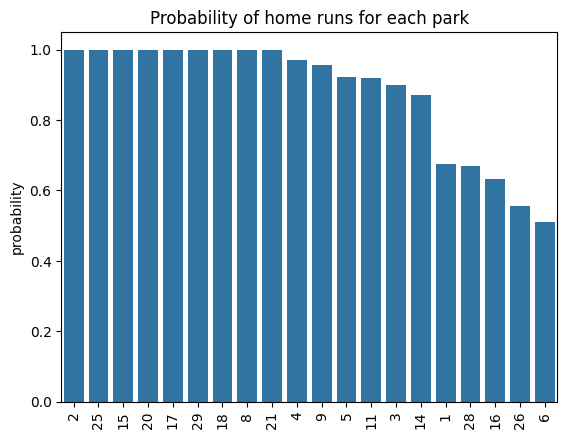

Here are top probability scores
2     1.0
25    1.0
15    1.0
20    1.0
17    1.0
Name: probability, dtype: float64


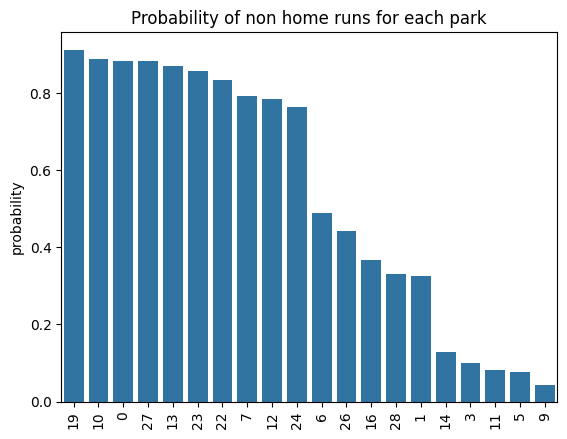

Here are top probability scores
19    0.913565
10    0.889946
0     0.884676
27    0.883848
13    0.870902
Name: probability, dtype: float64


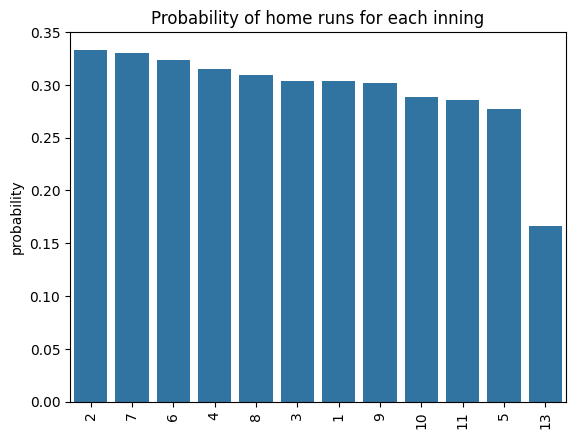

Here are top probability scores
2    0.333333
7    0.330150
6    0.323656
4    0.314585
8    0.309091
Name: probability, dtype: float64


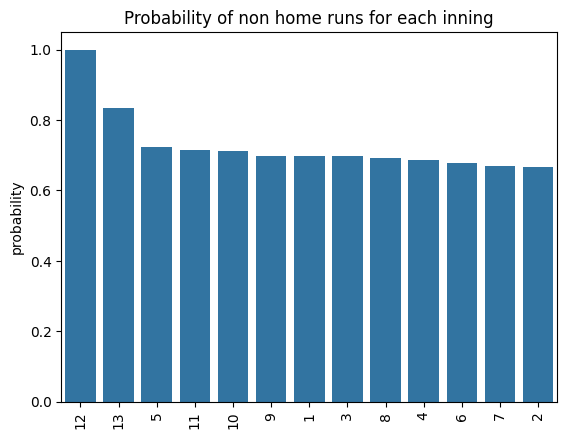

Here are top probability scores
12    1.000000
13    0.833333
5     0.723000
11    0.714286
10    0.711538
Name: probability, dtype: float64


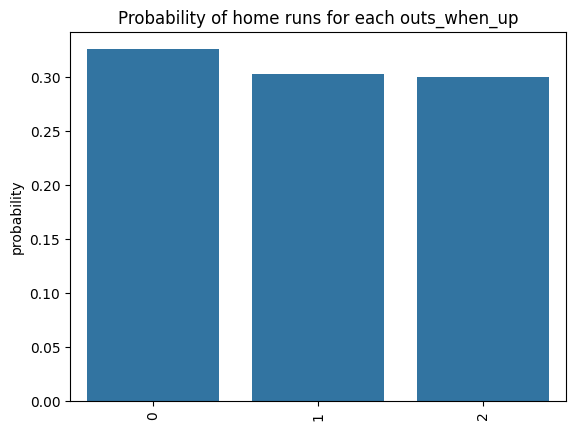

Here are top probability scores
0    0.325289
1    0.302550
2    0.299959
Name: probability, dtype: float64


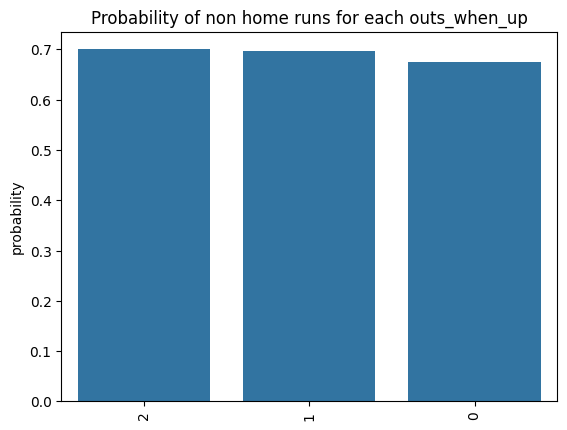

Here are top probability scores
2    0.700041
1    0.697450
0    0.674711
Name: probability, dtype: float64


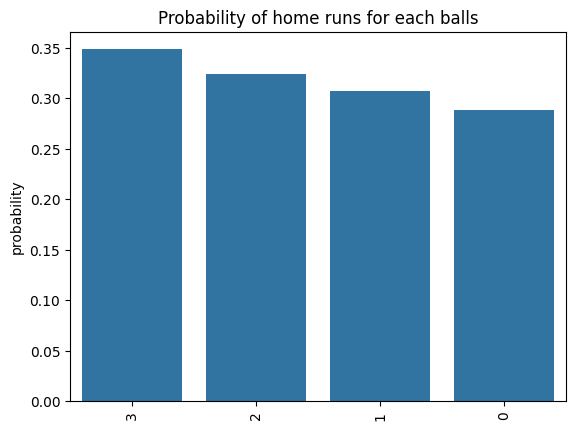

Here are top probability scores
3    0.348515
2    0.324403
1    0.307352
0    0.288648
Name: probability, dtype: float64


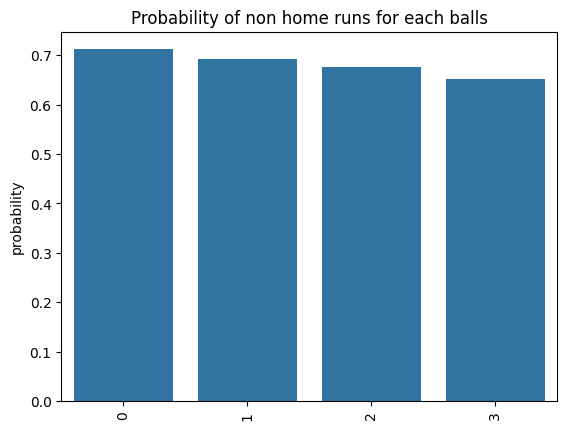

Here are top probability scores
0    0.711352
1    0.692648
2    0.675597
3    0.651485
Name: probability, dtype: float64


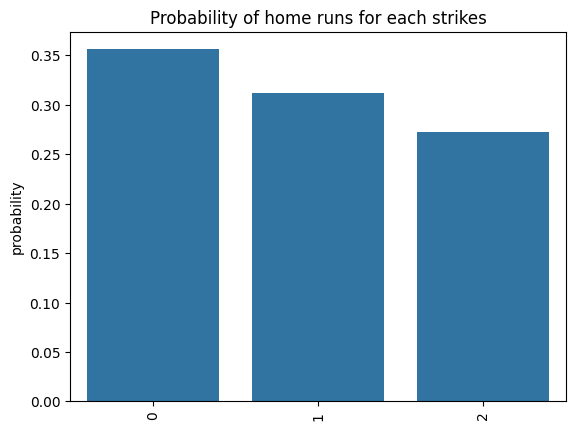

Here are top probability scores
0    0.355947
1    0.311708
2    0.272297
Name: probability, dtype: float64


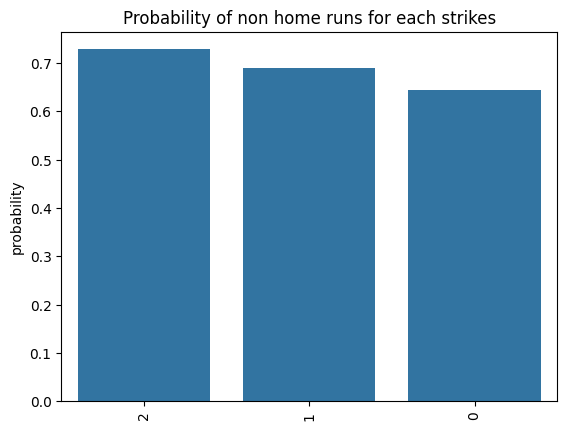

Here are top probability scores
2    0.727703
1    0.688292
0    0.644053
Name: probability, dtype: float64


In [38]:
data = data_frame.copy()
for col in discrete_features:
    if col!= 'is_home_run':
        data[col] = data_frame[col].astype(str)
        home_run_dict = {}
        non_home_run_dict = {}
        for label in data[col].unique():    
            ind_count = data.groupby(col)['is_home_run'].value_counts()[label]
            total_sum = ind_count.sum()
            if 0 in ind_count.index:
                label_0 = ind_count[0]
                non_home_run_prob = label_0/total_sum
                non_home_run_dict[label] = non_home_run_prob
            if 1 in ind_count.index:
                label_1 = ind_count[1]
                home_run_prob = label_1/total_sum
                home_run_dict[label] = home_run_prob
            
        
        homerun_df = pd.DataFrame({'probability':home_run_dict.values()},index = home_run_dict.keys())
        sorted_homerun_prob = homerun_df['probability'].sort_values(ascending=False)
        
        non_homerun_df = pd.DataFrame({'probability':non_home_run_dict.values()},index = non_home_run_dict.keys())
        sorted_non_homerun_prob = non_homerun_df['probability'].sort_values(ascending=False)
        
        plt.xticks(rotation = 90)
        plt.title(f'Probability of home runs for each {col}')
        sns.barplot(sorted_homerun_prob[:20]);
        plt.show()
        print('Here are top probability scores')
        print(sorted_homerun_prob[:5])
        
        
        #sorted non homerun prob
        plt.xticks(rotation = 90)
        plt.title(f'Probability of non home runs for each {col}')
        sns.barplot(sorted_non_homerun_prob[:20]);
        plt.show()
        print('Here are top probability scores')
        print(sorted_non_homerun_prob[:5])

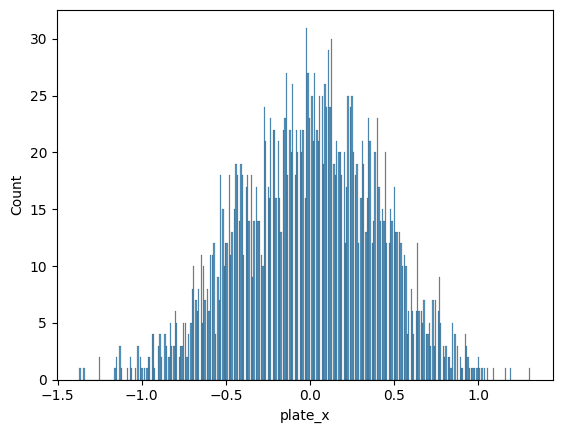

The top value ranges
plate_x
(0.0772, 0.131]     0.062117
(-0.03, 0.0236]     0.058439
(-0.191, -0.137]    0.049857
(0.0236, 0.0772]    0.049040
(0.238, 0.292]      0.048222
Name: count, dtype: float64


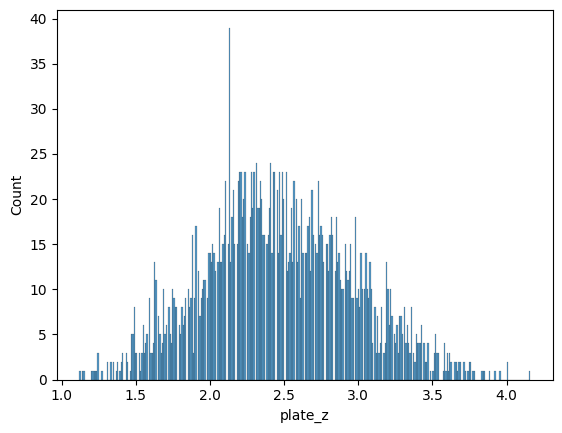

The top value ranges
plate_z
(2.275, 2.336]    0.051900
(2.397, 2.458]    0.050674
(2.093, 2.154]    0.050266
(2.458, 2.518]    0.048631
(2.154, 2.214]    0.048631
Name: count, dtype: float64


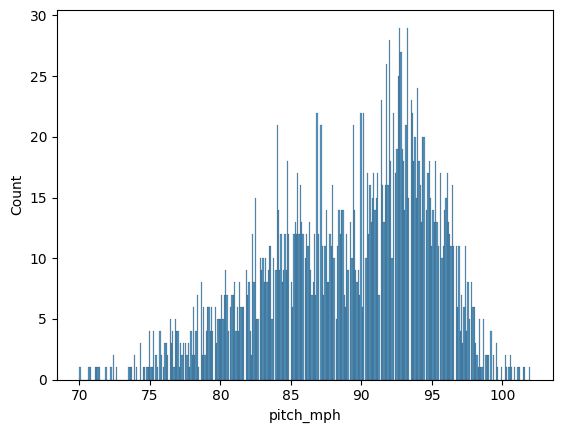

The top value ranges
pitch_mph
(92.4, 93.04]     0.055987
(91.76, 92.4]     0.055987
(93.68, 94.32]    0.050674
(93.04, 93.68]    0.050674
(94.32, 94.96]    0.042501
Name: count, dtype: float64


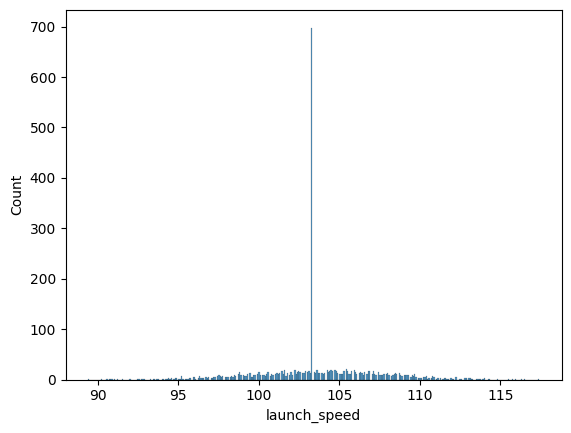

The top value ranges
launch_speed
(102.84, 103.4]     0.317123
(103.96, 104.52]    0.038414
(105.08, 105.64]    0.036780
(102.28, 102.84]    0.035962
(106.76, 107.32]    0.035962
Name: count, dtype: float64


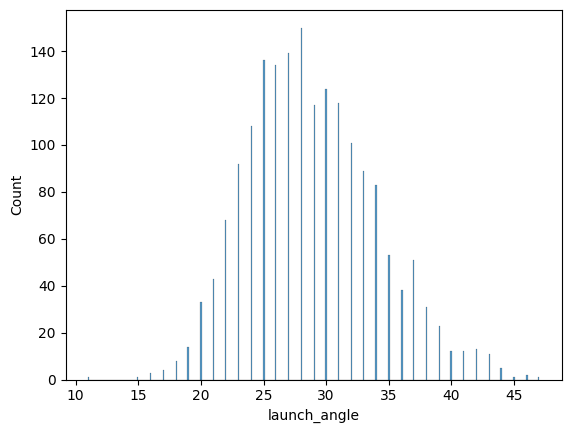

The top value ranges
launch_angle
(27.56, 28.28]    0.061300
(26.84, 27.56]    0.056804
(24.68, 25.4]     0.055578
(25.4, 26.12]     0.054761
(29.72, 30.44]    0.050674
Name: count, dtype: float64


In [42]:
home_run_df = data_frame[data_frame['is_home_run']==1]
float_cols = home_run_df.select_dtypes(include='float').columns
for col in float_cols:    
    sns.histplot(home_run_df[col],bins=350)
    plt.show();
    bins_df = pd.cut(home_run_df[col],bins = 50)
    print('The top value ranges')
    print(bins_df.value_counts()[:5]/len(home_run_df))